In [1]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
test_acc_dict = {}

for model in ['SNAW-Net', 'VGG-16', 'Resnet-18', 'Resnet-50']: 
    # Load TensorBoard log file
    log_file = "/Users/nikolairoehrich/Desktop/logs/" + model
    ea = event_accumulator.EventAccumulator(log_file)
    ea.Reload()

    # Extract scalar data (e.g., loss, accuracy)
    scalar_tags = ea.Tags()["scalars"]  # List all available scalar tags
    print("Available scalar tags:", scalar_tags)


    # Extract testing acc 
    data = []
    for event in ea.Scalars("Epoch Testing Accuracy"): 
        data.append([event.value])

    # Convert to a np array 
    acc = np.array(pd.DataFrame(data, columns=["value"]))
    test_acc_dict[model] = acc

Available scalar tags: ['Epoch Training Loss', 'Epoch Testing Loss', 'Epoch Training Accuracy', 'Epoch Testing Accuracy']
Available scalar tags: ['Epoch Training Loss', 'Epoch Testing Loss', 'Epoch Training Accuracy', 'Epoch Testing Accuracy']
Available scalar tags: ['Epoch Training Loss', 'Epoch Testing Loss', 'Epoch Training Accuracy', 'Epoch Testing Accuracy']
Available scalar tags: ['Epoch Training Loss', 'Epoch Testing Loss', 'Epoch Training Accuracy', 'Epoch Testing Accuracy']


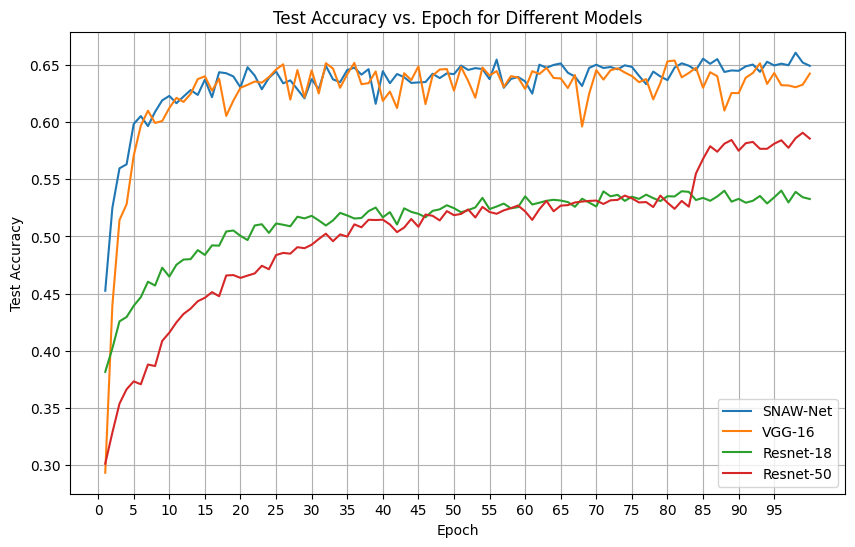

In [7]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each model's test accuracy
for model, acc in test_acc_dict.items():
    epochs = np.arange(1, len(acc) + 1)  # Generate epoch numbers (1 to 50)
    plt.plot(epochs, acc, label=model)

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Epoch for Different Models")
plt.legend()
plt.grid(True)

plt.yticks(np.arange(0.3, 0.7, 0.05))  # Assuming accuracy is in range [0,1]
plt.xticks(np.arange(0, 100, 5))  # Assuming accuracy is in range [0,1]

# Show the plot
plt.show()

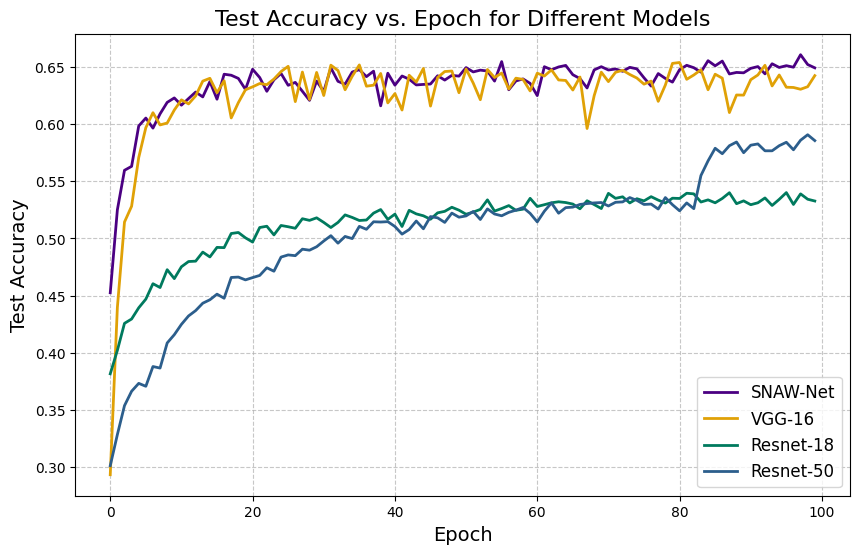

In [11]:
import matplotlib.pyplot as plt

# Define the updated darker color palette
colors = {
    "SNAW-Net": "#4B0082",    # Darker Purple
    "VGG-16": "#E0A106",      # Even Darker Yellow
    "Resnet-18": "#007A5E",   # Darker Teal/Green
    "Resnet-50": "#2C5E8C"    # Darker Steel Blue
}

# Plot using the updated color palette
plt.figure(figsize=(10, 6))

for model, acc in test_acc_dict.items():
    plt.plot(range(len(acc)), acc, label=model, color=colors[model], linewidth=2)

plt.title("Test Accuracy vs. Epoch for Different Models", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Test Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
